In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.seterr(divide="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
#Himmelblau FUnction
x=2
y=1
z=((x**2)+y-11)**2+(x+(y**2)-7)**2

In [4]:
print("Initial x: {:0.3f}".format(x))
print("Initial y: {:0.3f}".format(y))
print("Initial z: {:0.3f}".format(z))

Initial x: 2.000
Initial y: 1.000
Initial z: 52.000


In [5]:
T0 = 1000 # Initial temp
temp_for_plot = T0 # plotting purposes
M = 300 # How many times you will decrease the temperature
N = 15 # How many times you want to search ou neighbourhood
alpha = 0.85 # at what rate do you want to decrease your temperature
k = 0.1 # Helps reduce the step-size

In [6]:
temp = [] # Plot temp
obj_val = [] # plot the obj value reached at the end of each m 

In [7]:
# neighbourhood search
for i in range(M):
    for j in range(N):
        # For decision varibale x
        rand_num_x_1 = np.random.rand() # Increase or descreas x?
        rand_num_x_2 = np.random.rand() # by how much?
        
        if rand_num_x_1 >= 0.5: # if greater than 0.5 , we increase
            step_size_x = k * rand_num_x_2 # make sure to make a smaller step size
        else:
            step_size_x = -k * rand_num_x_2 # less than 0.5, we decrease
            
        # For decision varibale y
        rand_num_y_1 = np.random.rand()
        rand_num_y_2 = np.random.rand()
        
        if rand_num_y_1 >= 0.5:
            step_size_y = k * rand_num_y_2
        else:
            step_size_y = -k * rand_num_y_2
        # still temporary we do not know if we take it    
        x_temporary = x + step_size_x
        y_temporary = y + step_size_y
        
        # A possible solution
        obj_val_possible=((x_temporary**2)+y_temporary-11)**2+(x_temporary+(y_temporary**2)-7)**2
        # According to the formula in the theory discuss if we take it or not eventhoug ti is worse
        # The actual solution
        obj_val_current=((x**2)+y-11)**2+(x+(y**2)-7)**2
        
        # Should we accept worse moves?
        # take solution or not
        rand_num = np.random.rand()
        
        # If the possibe solution is better than go ahead.. if it is worse
        # Use the formula below
        
        formula = 1/(np.exp((obj_val_possible - obj_val_current)/T0))
        
        # do we change our current solution?
        
        if obj_val_possible <= obj_val_current:
            #if possible solution is better than we take it
            x = x_temporary
            y = y_temporary
            
        elif rand_num <= formula:
            # if the random number is less than output of formula we take it
            # remember that the lower the output is lesser the chance of the random number beating it
            x = x_temporary
            y = y_temporary
            
        else:
            # if random number was greater , we continue with the best solution
            x = x
            y = y
            
    temp.append(T0)
    obj_val.append(obj_val_current)
    
    T0 = alpha*T0
           

In [8]:
print("New x: {:0.3f}".format(x))
print("New y: {:0.3f}".format(y))
print("Obj val: {:0.3f}".format(obj_val_current))

New x: 3.001
New y: 2.001
Obj val: 0.000


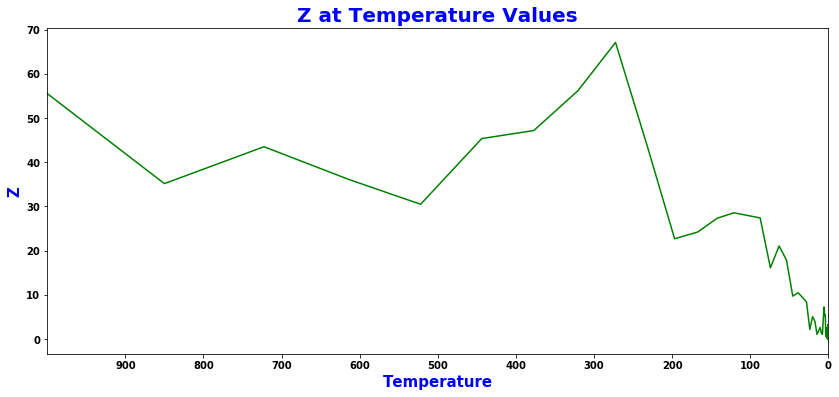

In [9]:
plt.figure(figsize=(14,6))
plt.plot(temp, obj_val, color ='g')
plt.title("Z at Temperature Values", fontsize=20, fontweight='bold', color = 'b')
plt.xlabel("Temperature", fontsize=15, fontweight='bold', color = 'b')
plt.ylabel("Z", fontsize=15, fontweight='bold', color='b')
plt.xlim(temp_for_plot,0)
plt.xticks(np.arange(min(temp), max(temp),100), fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()